In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


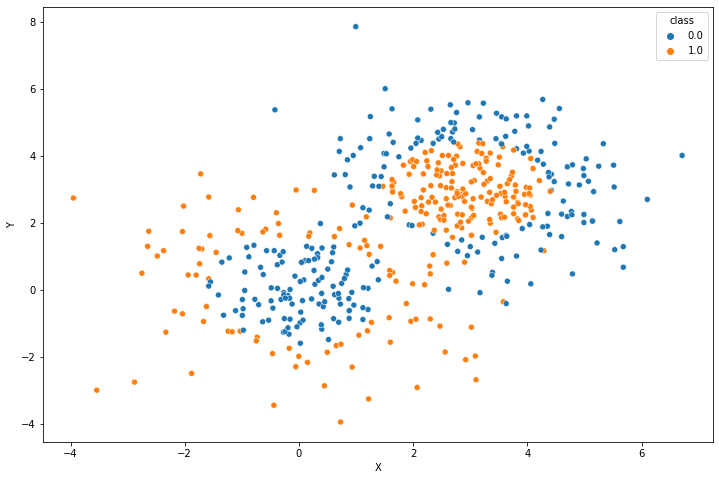

In [3]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [34]:
X = circ.drop('class', axis=1)
Y_test = circ['class']

In [35]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, Y_test)
Y = clf.predict(X)

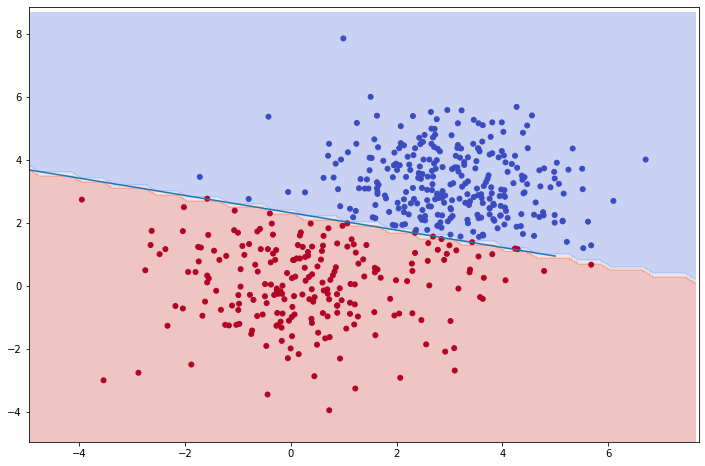

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(0)

fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, Y)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X.values[:, 0], X.values[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y)

0.424

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [38]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

list_clf = []

for k in all_k:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    print(f"kNN ({k}) = {accuracy_score(y_test, clf.predict(X_test))}")
    list_clf.append(clf)

kNN (1) = 0.89
kNN (3) = 0.87
kNN (10) = 0.85
kNN (30) = 0.74
kNN (40) = 0.75
kNN (60) = 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [43]:
!pip install mlxtend

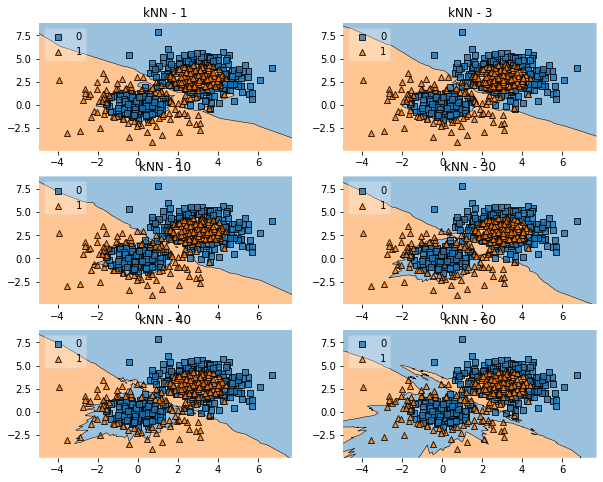

In [59]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(10,8))

labels = ['kNN - 1', 'kNN - 3', 'kNN - 10', 'kNN - 30', 'kNN - 40', 'kNN - 60']
for clf, lab, grd in zip(list_clf,
                         labels,
                         itertools.product([0, 1, 2], [0, 1])):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [91]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [93]:
### Your code is here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe_scale = Pipeline([("scaler", StandardScaler()),
                       ("clf", KNeighborsClassifier())])

pipe_without_scale = Pipeline([("clf", KNeighborsClassifier())])

In [94]:
parameters = {"clf__n_neighbors":[1, 5, 10]}

clf_scale = GridSearchCV(pipe_scale, parameters)
clf_scale.fit(X_train, y_train)
clf_scale.predict(X_test)

array([2, 2, 2, ..., 1, 1, 2], dtype=int64)

In [95]:
clf_without_scale = GridSearchCV(pipe_without_scale, parameters)
clf_without_scale.fit(X_train, y_train)
clf_without_scale.predict(X_test)

array([2, 2, 3, ..., 3, 2, 3], dtype=int64)

In [96]:
print(f"Accuracy on scale kNN = {accuracy_score(y_test, clf_scale.predict(X_test))}")
print(f"Accuracy on not scale kNN = {accuracy_score(y_test, clf_without_scale.predict(X_test))}")

Accuracy on scale kNN = 0.6607678578209851
Accuracy on not scale kNN = 0.4703603843086621


In [100]:
clf_scale.best_params_

{'clf__n_neighbors': 10}

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [120]:
### Your code is here
from scipy.spatial.distance import minkowski

pipe = Pipeline([("scaler", StandardScaler()),
                 ("clf", KNeighborsClassifier(n_neighbors=10, metric=minkowski, p=1))])


In [121]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(metric=<function minkowski at 0x0000022BD437EA60>,
                                      n_neighbors=10, p=1))])

In [123]:
y_pred = pipe.predict(X_test)

KeyboardInterrupt: 

In [ ]:
print(f"Accuracy on scale kNN = {accuracy_score(y_test, y_pred)}")

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [83]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


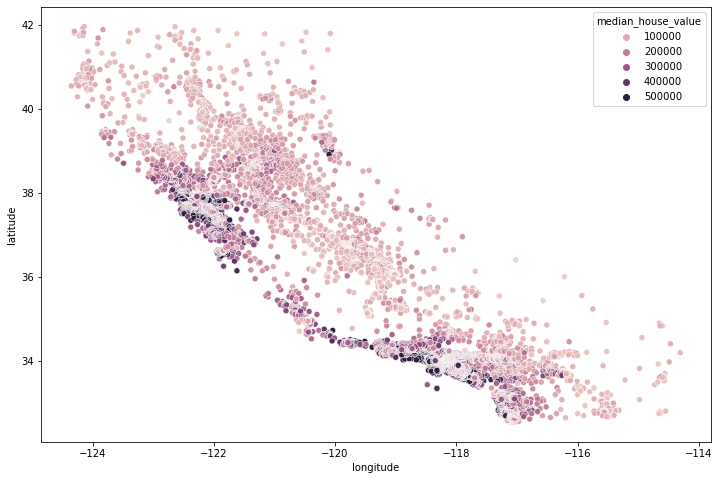

In [84]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
print(f"RMSE on linear regression = {mean_squared_error(y_test, model.predict(X_test))}")

In [ ]:
parameters = {"clf__n_neighbors":[1, 2, 3, 4, 5, 6, 7, 8, 9]}
pipe_reg = Pipeline([("scaler", StandardScaler()),
                 ("clf", KNeighborsClassifier())])
reg_scale = GridSearchCV(pipe_reg, parameters)
reg_scale.fit(X_train, y_train)
reg_scale.best_params_

In [ ]:
for h in np.arange(0.02, 0.1, 0.01):
    
    def kernel(distances, h=h):
            const = 1 / (np.sqrt(2 * np.pi))
            power = (-1/2) * ((distances)**2) / h**2
            return const * np.exp(power)

    pipe_reg = Pipeline([("scaler", StandardScaler()),
                         ("clf", KNeighborsClassifier(weights=kernel))])
    
    pipe_reg.fit(X_train, y_train)
    print(f"score = {mean_squared_error(y_test, pipe_reg.predict(X_test))}")
    print(f"h = {h}")
    print()